In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinic_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
complete_data = mouse_data_df.merge(clinic_trial_data_df, on = 'Mouse ID')

# Display the data table for preview
complete_data.head(20)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_reaction_response = complete_data.groupby(['Drug','Timepoint'])

# Convert to DataFrame
mean_tumor_volume_by_drug = drug_reaction_response['Tumor Volume (mm3)'].mean().to_frame()

# Preview DataFrame
mean_tumor_volume_by_drug.head(50)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
Ketapril  0                   45.000000
          5                   47.389175
          10                  49.582269
          15                  52.399974
          20                  54.920935
          25                  57.678982
          30                  60.994507
          35                  63.371686
          40                  66.068580
          45                  70.662958
Naftisol  0                   45.000000
          5                   46.796098
          10                  48.694210
          15                  50.933018
          20                  53.644087
          25                  56.731968
          30                  59.559509
          35                  62.685087
          40                  65.600754
          45                  69.265506

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame

drug_reaction_response_std_err = drug_reaction_response['Tumor Volume (mm3)'].sem().to_frame()
drug_reaction_response_std_err.head(5)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
unstack_mean_tumor_volume_by_drug = mean_tumor_volume_by_drug.unstack(0)
unstack_mean_tumor_volume_by_drug_df = unstack_mean_tumor_volume_by_drug['Tumor Volume (mm3)']
# Preview that Reformatting worked
unstack_mean_tumor_volume_by_drug_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


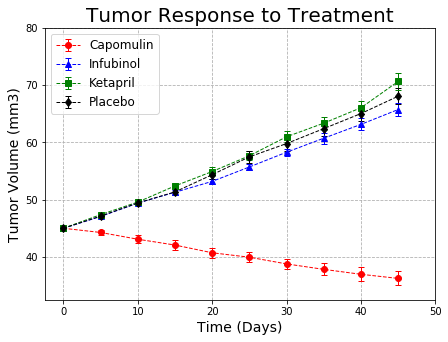

In [5]:
# Generate the Plot (with Error Bars)
x_axis = [x for x in range(0, 50, 5)]

plt.figure(figsize=(7, 5))

tum_capomulin_err = drug_reaction_response_std_err['Tumor Volume (mm3)']['Capomulin']
tum_infubinol_err = drug_reaction_response_std_err['Tumor Volume (mm3)']['Infubinol']
tum_ketapril_err = drug_reaction_response_std_err['Tumor Volume (mm3)']['Ketapril']
tum_placebo_err = drug_reaction_response_std_err['Tumor Volume (mm3)']['Placebo']

tum_capomulin_plt = plt.errorbar(x_axis, 
                             unstack_mean_tumor_volume_by_drug_df['Capomulin'], 
                             yerr = tum_capomulin_err, fmt = 'o', ls = 'dashed', 
                             color = 'red', linewidth = 1, alpha = 1, capsize = 3)

tum_infubinol_plt = plt.errorbar(x_axis, 
                             unstack_mean_tumor_volume_by_drug_df['Infubinol'], 
                             yerr = tum_infubinol_err, fmt = '^', ls = 'dashed', 
                             color = 'blue', linewidth = 1, alpha = 1, capsize = 3)

tum_ketapril_plt = plt.errorbar(x_axis, 
                            unstack_mean_tumor_volume_by_drug_df['Ketapril'], 
                            yerr = tum_ketapril_err, fmt = 's', ls = 'dashed', 
                            color = 'green', linewidth = 1, alpha = 1, capsize = 3)

tum_placebo_plt = plt.errorbar(x_axis, 
                           unstack_mean_tumor_volume_by_drug_df['Placebo'], 
                           yerr = tum_placebo_err, fmt = 'd', ls = 'dashed', 
                           color = 'black', linewidth = 1, alpha = 1, capsize = 3)

plt.ylim(32.5, 80)
plt.xlim(-2.5,50)

plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((tum_capomulin_plt, tum_infubinol_plt, tum_ketapril_plt, tum_placebo_plt), 
           ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# Save the Figure

plt.savefig('./Tumor_Response_to_Treatment.png')
plt.show()



## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_meta_response = complete_data.groupby(['Drug','Timepoint'])
# Convert to DataFrame
mean_meta_response = grouped_meta_response['Metastatic Sites'].mean().to_frame()
# Preview DataFrame
mean_meta_response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
std_err_meta_response = grouped_meta_response['Metastatic Sites'].sem().to_frame()
# Preview DataFrame
std_err_meta_response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
unstack_mean_meta_resp = mean_meta_response.unstack(0)
unstack_mean_meta_resp_df = unstack_mean_meta_resp['Metastatic Sites']

# Preview that Reformatting worked
unstack_mean_meta_resp_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


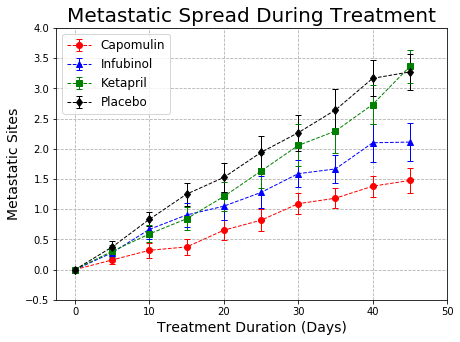

In [9]:
# Generate the Plot (with Error Bars)

x_axis = [x for x in range(0, 50, 5)]

plt.figure(figsize=(7, 5))

meta_capomulin_err = std_err_meta_response['Metastatic Sites']['Capomulin']
meta_infubinol_err = std_err_meta_response['Metastatic Sites']['Infubinol']
meta_ketapril_err = std_err_meta_response['Metastatic Sites']['Ketapril']
meta_placebo_err = std_err_meta_response['Metastatic Sites']['Placebo']

meta_capomulin_plt = plt.errorbar(x_axis, 
                             unstack_mean_meta_resp_df['Capomulin'], 
                             yerr = meta_capomulin_err, fmt = 'o', ls = 'dashed', 
                             color = 'red', linewidth = 1, alpha = 1, capsize = 3)

meta_infubinol_plt = plt.errorbar(x_axis, 
                             unstack_mean_meta_resp_df['Infubinol'], 
                             yerr = meta_infubinol_err, fmt = '^', ls = 'dashed', 
                             color = 'blue', linewidth = 1, alpha = 1, capsize = 3)

meta_ketapril_plt = plt.errorbar(x_axis, 
                            unstack_mean_meta_resp_df['Ketapril'], 
                            yerr = meta_ketapril_err, fmt = 's', ls = 'dashed', 
                            color = 'green', linewidth = 1, alpha = 1, capsize = 3)

meta_placebo_plt = plt.errorbar(x_axis, 
                           unstack_mean_meta_resp_df['Placebo'], 
                           yerr = meta_placebo_err, fmt = 'd', ls = 'dashed', 
                           color = 'black', linewidth = 1, alpha = 1, capsize = 3)

plt.ylim(-0.5, 4)
plt.xlim(-2.5,50)

plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.ylabel("Metastatic Sites", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((meta_capomulin_plt, meta_infubinol_plt, meta_ketapril_plt, meta_placebo_plt), 
           ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# Save the Figure

plt.savefig('./Metastatic_Spread_During_Treatment.png')
plt.show()


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_grp = complete_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
mice_df = mice_grp.to_frame()
mice_df = mice_df.rename(columns = {'Mouse ID': 'Mouse Count'})
# Preview DataFrame
mice_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
unstack_mice_data = mice_df.unstack(0)
# Preview the Data Frame
unstack_mice_data_df = unstack_mice_data['Mouse Count']
unstack_mice_data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


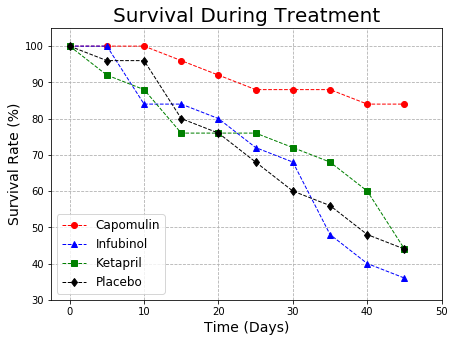

In [12]:
# Generate the Plot (Accounting for percentages)
x_axis = [x for x in range(0, 50, 5)]

plt.figure(figsize=(7, 5))

surv_capomulin_plt = plt.errorbar(x_axis, 
                     100 * unstack_mice_data_df['Capomulin']/max(unstack_mice_data_df['Capomulin']), 
                     fmt = 'o', ls = 'dashed', 
                     color = 'red', linewidth = 1, alpha = 1, capsize = 3)

surv_infubinol_plt = plt.errorbar(x_axis, 
                     100 * unstack_mice_data_df['Infubinol']/max(unstack_mice_data_df['Infubinol']), 
                     fmt = '^', ls = 'dashed', 
                     color = 'blue', linewidth = 1, alpha = 1, capsize = 3)

surv_ketapril_plt = plt.errorbar(x_axis, 
                    100 * unstack_mice_data_df['Ketapril']/max(unstack_mice_data_df['Ketapril']), 
                    fmt = 's', ls = 'dashed', 
                    color = 'green', linewidth = 1, alpha = 1, capsize = 3)

surv_placebo_plt = plt.errorbar(x_axis, 
                   100 * unstack_mice_data_df['Placebo']/max(unstack_mice_data_df['Placebo']), 
                   fmt = 'd', ls = 'dashed', 
                   color = 'black', linewidth = 1, alpha = 1, capsize = 3)

plt.ylim(30, 105)
plt.xlim(-2.5,50)

plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((surv_capomulin_plt, surv_infubinol_plt, surv_ketapril_plt, surv_placebo_plt), 
           ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# Save the Figure
plt.savefig('./Survival_During_Treatment.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
pct_change_all_period = unstack_mean_tumor_volume_by_drug_df.pct_change(periods=9)
# Display the data to confirm
pct_change_all_period = pct_change_all_period.iloc[9, :]*100
pct_change_all_period = pct_change_all_period.to_frame()
pct_change_all_period = pct_change_all_period.rename(columns = {45: '% Change'})
pct_change_all_period


,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


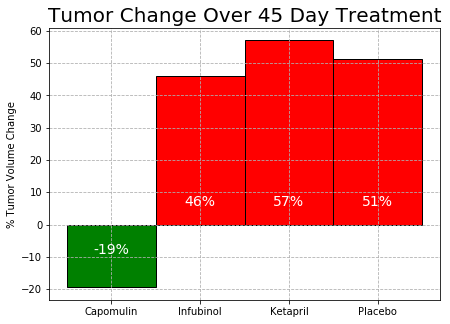

In [14]:
x_axis = [x for x in range(0, 50, 5)]

plt.figure(figsize=(7, 5))

# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs
drugs_selected = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
tick_locations = []

pct_change_all_period.sort_values(by = '% Change', inplace = True)

# Use functions to label the percentages of changes
def label_bar(bar_container, label_offset):
    for bar in bar_container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., label_offset,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)


for index, item in enumerate(drugs_selected): 
    bar_color = ''
    if pct_change_all_period['% Change'][item] < 0: 
        bar_color = 'g'
        label_offset = -10
    else: 
        bar_color = 'r'
        label_offset = 5
    
    bar = plt.bar(index, pct_change_all_period['% Change'][item], 
                  color = bar_color, alpha = 1, 
                  align = 'edge', ec = 'black', 
                  width = 1)
    tick_locations.append(index + 0.5)
    
    # Call functions to implement the function calls
    label_bar(bar, label_offset)


# Orient widths. Add labels, tick marks, etc. 
plt.grid(linestyle = 'dashed')
plt.title("Tumor Change Over 45 Day Treatment", fontsize = 20)
plt.ylabel("% Tumor Volume Change")
plt.xticks(tick_locations, drugs_selected)

# Save the Figure
plt.savefig('./Tumor_Change_Over_45_Day_Treatment.png')

# Show the Figure
plt.show()
